1. 以下关于决策树的说法错误的是：   
   A. 决策树选择具有更强分类能力的特征进行分裂。   
   B. 决策树只能处理分类问题，无法处理连续的回归问题。   
   C. 决策树可以解决非线性可分的分类问题。   
   D. 决策树的预测结果分布在叶子节点上。  

答：   
A. 正确。决策树选择最优的特征作为划分标准进行分裂，从而提高模型的准确性。  
B. 错误。决策树可以处理连续的回归问题，将连续的特征划分为离散的区间就可以解决回归的问题了。  
C. 正确。决策树是非参数模型，根据数据的分布来选择合适的特征分类，解决非线性可分的分类问题。  
D. 正确。决策树的内部节点是判断条件，叶子节点是预测/分类结果。

---

2. 以下关于ID3算法的说法错误的是：   
   A. 由ID3算法构建的决策树，一个特征不会在同一条路径中出现两次。   
   B. 作为非参数化模型，ID3算法不会出现过拟合。   
   C. 在节点分裂出来的树枝数目取决于分类特征可能取值的数量。   
   D. 信息增益率为信息增益与熵之间的比值，可以排除特征本身复杂度的影响。  

答：  
A. 正确。ID3算法每个特征只会一条路径上出现一次，避免重复使用。  
B. 错误。理论上树的深度过大和叶子节点过多能逼近到数据的分布，导致过拟合。需要剪枝机制处理。  
C. 正确。节点分裂树枝的数目取决于分类特征取值的数量。如果是分类问题，那么分类的类别就是树枝数，如果是回归问题，会对取值进行离散化处理，划分成不同的区间进行取值。    
D. 正确。信息增益是特征对目标变量的信息贡献，熵是信息的复杂度，信息增益率能更好的衡量特征对目标变量的信息贡献，避免选择复杂度很高，增益很小的特征，排除复杂度的影响。

---

3. 设$X$和$Y$是相互独立的随机变量，证明：
   $$H(XY)=H(X)+H(Y) \\ H(XX)=H(X)$$  
其中$H(XY)$表示变量$X$和$Y$的联合熵，是基于其联合分布$p(X,Y)$而计算的。

~~看错题目了直接浪费两小时~~  
**证明：**

熵：$H(X)=-\sum_{x}p(x)\log{p(x)}$  
联合熵：$H(XY)=-\sum_{x}\sum_{y}p(x,y)\log{p(x,y)}$  

- 
$$
\begin{aligned} 
H(XY) 
&= -\sum_{x}\sum_{y} p(x,y) \log p(x,y) \\ 
&= -\sum_{x}\sum_{y} p(x)p(y) \log (p(x)p(y)) \\ 
&= -\sum_{x}\sum_{y} p(x)p(y) (\log p(x) + \log p(y)) \\ 
&= -(\sum_{x}p(x)\log p(x)\sum_{y}p(y))-(\sum_{y}p(y)\log p(y)\sum_{x}p(x)) \\
&其中\sum_{x}p(x) = \sum_{y}p(y) = 1 \\
&= -(\sum_{x} p(x) \log p(x)) - (\sum_{y} p(y) \log p(y)) \\ 
&= H(X) + H(Y) \end{aligned}
$$

-  不会
$p(X,X)=p(X=x)p(X=x)=p(X)^2$
$$
\begin{align*}
H(XX) 
&= \sum_{x}\sum_{x}p(x,x)\log p(x,x) 
\end{align*}
$$

---

4. 在12.1节的例子中，计算用湿度为标准进行一次分类的信息增益和信息增益率。

答：  
- 用湿度分类：记湿度高为$Y_H$，湿度中为$Y_M$。
  - 湿度高样本8个，其中外出2个，未外出6个，得
    $$H(X|Y_H)=-\frac{6}{8}\log\frac{6}{8}-\frac{2}{8}\log\frac{2}{8}\approx 0.8113$$
  - 湿度中样本6个，外出5个，未外出1个，得
    $$H(X|Y_M)=-\frac{5}{6}\log\frac{5}{6}-\frac{1}{6}\log\frac{1}{6}\approx 0.6500$$
  - 条件熵
    $$H(X|Y)\approx H(X|Y_H)\times\frac{8}{14} + H(X|Y_M)\times\frac{6}{14}\approx 0.7422$$
  - 信息增益
    $$I(X|Y)\approx H(X)-H(X|Y)\approx 1-0.7422\approx 0.2578$$
  - 分布的熵
    $$H_Y(X) = -\frac{8}{14}\log\frac{8}{14}-\frac{6}{14}\log\frac{6}{14}\approx 0.9853$$
  - 信息增益率
    $$I_R(X,Y) = \frac{I(X|Y)}{H_Y(X)}\approx \frac{0.2578}{0.9853} \approx 0.2616$$


---

5. 在本章C4.5决策树代码的基础上实现CART分类树。

- 不纯度度量方法更改
  - C4.5：信息增益比
  - CART：基尼不纯度
- 节点分裂方法更改
  - C4.5：可分裂多个子节点
  - CART：二叉分裂，两个子节点
- 叶结点表示类别更改
  - C4.5：多个类别
  - CART：单一类别
- 剪枝策略更改
  - C4.5：预剪枝/后剪枝
  - CART：后剪枝
- other
  - 数据集分割（split_dataset）：根据特征和阈值将数据集分割成两个子集，这是CART决策树分裂过程中的一个关键步骤。

寻找最佳分裂点（find_best_split）：遍历所有特征和可能的阈值，寻找能够最大程度降低基尼不纯度的最佳分裂点。

构建决策树（build_tree）：递归地构建决策树，根据数据集的当前状态决定是继续分裂还是创建叶节点。

训练（fit）：通过调用build_tree方法来训练决策树。

预测（predict_instance 和 predict）：通过递归地遍历决策树来预测单个或多个样本的类别。

准确率计算（accuracy）：计算模型在给定数据集上的预测准确率。

In [1]:
# 数据预处理代码
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据
data = pd.read_csv('../titanic/train.csv')
# 删去编号、姓名、船票编号3列
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

feat_ranges = {}
cont_feat = ['Age', 'Fare'] # 连续特征
bins = 10 # 分类点数

for feat in cont_feat:
    # 数据集中存在缺省值nan，需要用np.nanmin和np.nanmax
    min_val = np.nanmin(data[feat]) 
    max_val = np.nanmax(data[feat])
    feat_ranges[feat] = np.linspace(min_val, max_val, bins).tolist()


# 只有有限取值的离散特征
cat_feat = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Cabin', 'Embarked'] 
for feat in cat_feat:
    data[feat] = data[feat].astype('category') # 数据格式转为分类格式
    data[feat] = data[feat].cat.codes.to_list() # 将类别按顺序转换为整数
    ranges = list(set(data[feat]))
    ranges.sort()
    feat_ranges[feat] = ranges

# 将所有缺省值替换为-1
data.fillna(-1, inplace=True)
for feat in feat_ranges.keys():
    feat_ranges[feat] = [-1] + feat_ranges[feat]    

# 划分训练集与测试集
np.random.seed(0)
feat_names = data.columns[1:]
label_name = data.columns[0]
# 重排下标之后，按新的下标索引数据
data = data.reindex(np.random.permutation(data.index))
ratio = 0.8
split = int(ratio * len(data))
train_x = data[:split].drop(columns=['Survived']).to_numpy()
train_y = data['Survived'][:split].to_numpy()
test_x = data[split:].drop(columns=['Survived']).to_numpy()
test_y = data['Survived'][split:].to_numpy()
print('训练集大小：', len(train_x))
print('测试集大小：', len(test_x))
print('特征数：', train_x.shape[1])  

训练集大小： 712
测试集大小： 179
特征数： 8


In [2]:
# 定义节点类，每个节点是决策树的一个组成部分
class Node:
    def __init__(self):
        self.feature_index = None  # 特征索引，表示该节点分裂的特征在数据集中的位置
        self.threshold = None       # 分裂阈值，表示特征分裂的阈值
        self.left_child = None      # 左子节点
        self.right_child = None     # 右子节点
        self.predicted_class = None # 预测类别，如果是叶节点则存储预测的类别

# 定义CART决策树类
class CARTDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth                      # 最大深度，限制树生长的最大深度
        self.min_samples_split = min_samples_split      # 最小分裂样本数，节点样本数小于该值时停止分裂
        self.tree = None                                # 构建的决策树
        self.T = 0                                      # 叶节点数量

    def gini(self, Y):  # 计算基尼不纯度的函数
        _, counts = np.unique(Y, return_counts=True)  # 获取类别和对应的计数
        probabilities = counts / len(Y)               # 计算每个类别的概率
        gini_index = 1 - np.sum(probabilities ** 2)  # 计算基尼不纯度
        return gini_index

    def split_dataset(self, X, Y, feature_index, threshold):  # 按特征和阈值分割数据集的函数
        left_indices = np.where(X[:, feature_index] <= threshold)[0]  # 获取左侧子集的索引
        right_indices = np.where(X[:, feature_index] > threshold)[0]   # 获取右侧子集的索引
        X_left = X[left_indices]                            # 左侧子集的特征数据
        Y_left = Y[left_indices]                            # 左侧子集的目标数据
        X_right = X[right_indices]                           # 右侧子集的特征数据
        Y_right = Y[right_indices]                           # 右侧子集的目标数据
        return X_left, Y_left, X_right, Y_right

    def find_best_split(self, X, Y):  # 寻找最佳分裂点的函数
        best_gini = float('inf')  # 初始化最佳基尼不纯度为无穷大
        best_feature_index = None  # 初始化最佳特征索引
        best_threshold = None      # 初始化最佳阈值

        for feature_index in range(X.shape[1]):  # 遍历所有特征
            thresholds = np.unique(X[:, feature_index])  # 获取该特征的所有唯一值
            for threshold in thresholds:  # 遍历所有唯一值作为可能的阈值
                X_left, Y_left, X_right, Y_right = self.split_dataset(X, Y, feature_index, threshold)  # 分割数据集
                if len(Y_left) < self.min_samples_split or len(Y_right) < self.min_samples_split:  # 检查子集大小是否满足最小样本数要求
                    continue
                gini_left = self.gini(Y_left)  # 计算左侧子集的基尼不纯度
                gini_right = self.gini(Y_right)  # 计算右侧子集的基尼不纯度
                gini_index = (len(Y_left) / len(Y)) * gini_left + (len(Y_right) / len(Y)) * gini_right  # 计算加权平均基尼不纯度
                if gini_index < best_gini:  # 如果当前分裂点的基尼不纯度更低，则更新最佳分裂点
                    best_gini = gini_index
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def build_tree(self, X, Y, depth):  # 构建决策树的函数
        if len(np.unique(Y)) == 1:  # 如果所有样本都属于同一类别，则创建叶节点
            leaf = Node()
            leaf.predicted_class = Y[0]
            self.T += 1
            return leaf
        if self.max_depth is not None and depth >= self.max_depth:  # 如果达到最大深度限制，则创建叶节点
            leaf = Node()
            leaf.predicted_class = np.argmax(np.bincount(Y))
            self.T += 1
            return leaf
        if len(Y) < self.min_samples_split:  # 如果样本数量小于最小分裂样本数，则创建叶节点
            leaf = Node()
            leaf.predicted_class = np.argmax(np.bincount(Y))
            self.T += 1
            return leaf

        feature_index, threshold = self.find_best_split(X, Y)  # 寻找最佳分裂点
        if feature_index is None or threshold is None:  # 如果没有找到合适的分裂点，则创建叶节点
            leaf = Node()
            leaf.predicted_class = np.argmax(np.bincount(Y))
            self.T += 1
            return leaf

        X_left, Y_left, X_right, Y_right = self.split_dataset(X, Y, feature_index, threshold)  # 根据最佳分裂点分割数据集

        node = Node()  # 创建当前节点
        node.feature_index = feature_index  # 设置特征索引
        node.threshold = threshold  # 设置分裂阈值
        node.left_child = self.build_tree(X_left, Y_left, depth + 1)  # 递归构建左子树
        node.right_child = self.build_tree(X_right, Y_right, depth + 1)  # 递归构建右子树

        return node

    def fit(self, X, Y):  # 训练决策树的函数
        self.tree = self.build_tree(X, Y, 0)  # 从根节点开始构建树

    def predict_instance(self, x, node):  # 预测单个样本类别的函数
        if node.predicted_class is not None:  # 如果当前节点是叶节点
            return node.predicted_class
        if x[node.feature_index] <= node.threshold:  # 根据特征值判断走左子树还是右子树
            return self.predict_instance(x, node.left_child)
        else:
            return self.predict_instance(x, node.right_child)

    def predict(self, X):  # 预测多个样本类别的函数
        if self.tree is None:  # 如果树未训练
            raise Exception("Decision tree has not been trained yet.")
        predictions = []  # 存储预测结果
        for x in X:  # 遍历所有样本
            predictions.append(self.predict_instance(x, self.tree))  # 递归预测每个样本的类别
        return predictions

    def accuracy(self, X, Y):  # 计算准确率的函数
        predictions = self.predict(X)  # 获取预测结果
        correct = np.sum(predictions == Y)  # 计算正确预测的数量
        total = len(Y)  # 获取样本总数
        return correct / total  # 计算并返回准确率

In [3]:

DT = CARTDecisionTree()
DT.fit(train_x, train_y)

# 计算在训练集和测试集上的准确率
print('叶节点数量：', DT.T)
print('训练集准确率：', DT.accuracy(train_x, train_y))
print('测试集准确率：', DT.accuracy(test_x, test_y))

叶节点数量： 123
训练集准确率： 0.9353932584269663
测试集准确率： 0.7541899441340782


---

6. 尝试将决策树应用到第11章支持向量机中用到的linear.csv和spiral.csv分类数据集上。先猜想一下分类效果与支持向量机相比如何，再用实验验证你的猜想。注意，需要先对连续特征离散化。

- 对于线性可分的数据，决策树和支持向量机比较好地划分数据，决策树有明显的折线，说明是树的形式划分的
- 对于线性不可分的数据，决策树和支持向量机不好划分数据。调参后能大概拟合。
- 离散化使得这两个数据集不适合训练，故没有离散化。

linear dataset - DecisionTree Acc: 1.0


d:\miniconda\envs\d2l\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


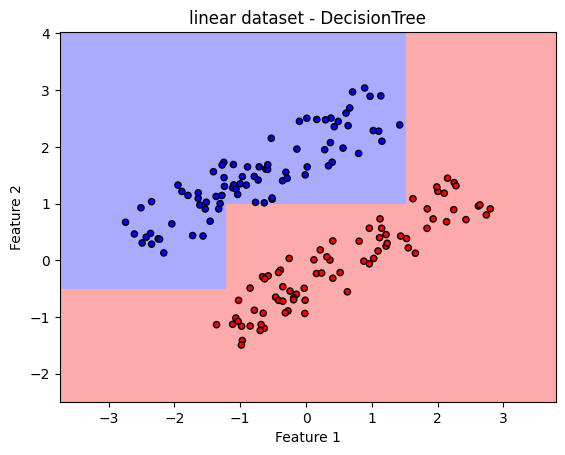

linear dataset - SVM Acc: 1.0


d:\miniconda\envs\d2l\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


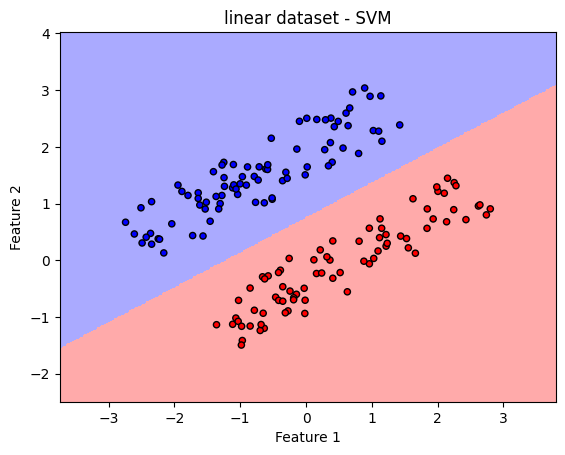

spiral dataset - DecisionTree Acc: 0.6666666666666666


d:\miniconda\envs\d2l\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


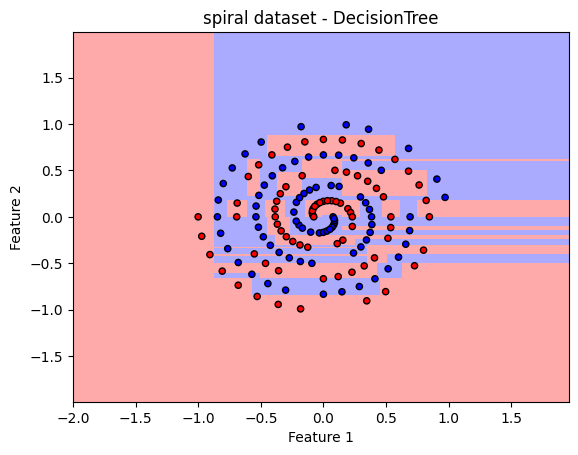

spiral dataset - SVM Acc: 0.6410256410256411


d:\miniconda\envs\d2l\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


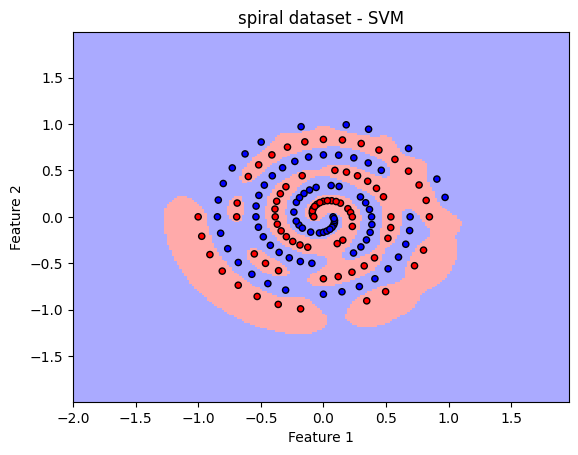

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 定义绘制决策边界函数
def plot_decision_boundary(model, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 加载数据
linear_data = pd.read_csv('D:/我的学习/Machine_Learning/动手学机器学习/Hands-on-ML/第11章 支持向量机/linear.csv')
spiral_data = pd.read_csv('D:/我的学习/Machine_Learning/动手学机器学习/Hands-on-ML/第11章 支持向量机/spiral.csv')

# 划分特征和标签
y_linear = linear_data.iloc[:, -1]
y_spiral = spiral_data.iloc[:, -1]

# 划分数据集为训练集和测试集
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(linear_data.iloc[:, :-1], y_linear, test_size=0.2, random_state=42)
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(spiral_data.iloc[:, :-1], y_spiral, test_size=0.2, random_state=42)

# 创建并训练DecisionTree模型
dt_linear = DecisionTreeClassifier(random_state=42)
dt_linear.fit(X_linear_train, y_linear_train)

dt_spiral = DecisionTreeClassifier(random_state=42)
dt_spiral.fit(X_spiral_train, y_spiral_train)

# 创建并训练支持向量机模型
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_linear_train, y_linear_train)

svm_spiral = SVC(kernel='rbf', gamma=50, tol=1e-6, random_state=42)
svm_spiral.fit(X_spiral_train, y_spiral_train)

# 在测试集上进行预测并计算准确率
dt_linear_pred = dt_linear.predict(X_linear_test)
dt_linear_accuracy = accuracy_score(y_linear_test, dt_linear_pred)

dt_spiral_pred = dt_spiral.predict(X_spiral_test)
dt_spiral_accuracy = accuracy_score(y_spiral_test, dt_spiral_pred)

svm_linear_pred = svm_linear.predict(X_linear_test)
svm_linear_accuracy = accuracy_score(y_linear_test, svm_linear_pred)

svm_spiral_pred = svm_spiral.predict(X_spiral_test)
svm_spiral_accuracy = accuracy_score(y_spiral_test, svm_spiral_pred)

print("linear dataset - DecisionTree Acc:", dt_linear_accuracy)
plot_decision_boundary(dt_linear, X_linear_train.values, y_linear_train, title="linear dataset - DecisionTree")
print("linear dataset - SVM Acc:", svm_linear_accuracy)
plot_decision_boundary(svm_linear, X_linear_train.values, y_linear_train, title="linear dataset - SVM")
print("spiral dataset - DecisionTree Acc:", dt_spiral_accuracy)
plot_decision_boundary(dt_spiral, X_spiral_train.values, y_spiral_train, title="spiral dataset - DecisionTree")
print("spiral dataset - SVM Acc:", svm_spiral_accuracy)
plot_decision_boundary(svm_spiral, X_spiral_train.values, y_spiral_train, title="spiral dataset - SVM")

---

7. 假设在一个二维数据的二分类任务中，最优分类边界是$x_1-x_2=0$，但是决策树模型只能沿着坐标轴的方向去切分二维数据空间，这样耗费很多分裂节点也无法取得很好的分类性能，试思考在此类情形下应该如何应对。

答：  
可以考虑将原始的数据进行线性变换或非线性变换，将数据映射到新的特征空间中去，进行降维。或者添加一些新的特征到数据集里面去，比如将特征加起来，这些新数据可以是原数据的一些能反映特征的数据。实在不行就使用别的模型，使用集成学习等